In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

In [ ]:
#making dataset
N=1000
x=np.random.random((N,2))*6-3#uniformly distributed between -3 and +3
y=np.cos(2*x[:,0])+np.cos(3*x[:,1])# this implement the function:cos(2x1)+cos(3x2)


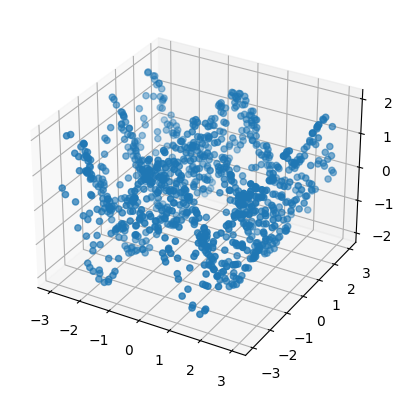

In [ ]:
#plot it
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x[:,0],x[:,1],y)

In [ ]:
#build the model
model=tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
#compile the model
model.compile( optimizer=tf.keras.optimizers.SGD(0.001,0.9), loss='mse')


In [ ]:
r=model.fit(x,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.9842
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 0.9589
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9501
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.9424
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9422
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9360
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9351
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9348
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9272
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9208
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9201
Epoch 12/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9209
Epoch 13/100
32/32 [=================

Text(0, 0.5, 'loss')

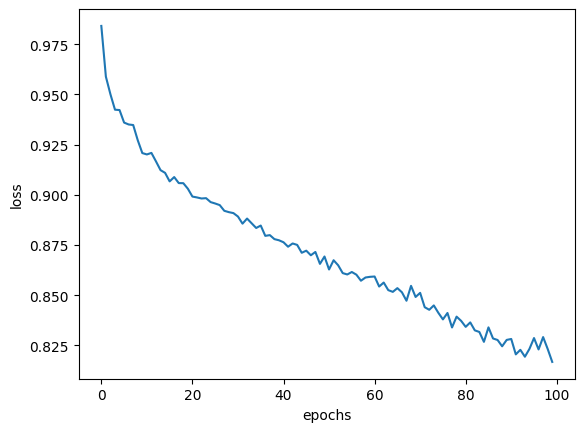

In [ ]:

plt.plot(r.history['loss'],label='loss')
plt.xlabel("epochs")
plt.ylabel("loss")

In [ ]:
#plot the prediction surface


79/79 [==============================] - 0s 1ms/step


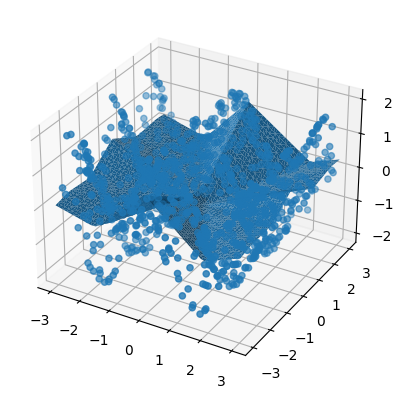

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x[:,0],x[:,1],y)
#surface plot
line=np.linspace(-3,3,50)
xx,yy=np.meshgrid(line,line)
xgrid=np.vstack((xx.flatten(),yy.flatten())).T
yhat=model.predict(xgrid).flatten()
ax.plot_trisurf(xgrid[:,0],xgrid[:,1],yhat,linewidth=0.2,antialiased=True)
plt.show()

79/79 [==============================] - 0s 1ms/step


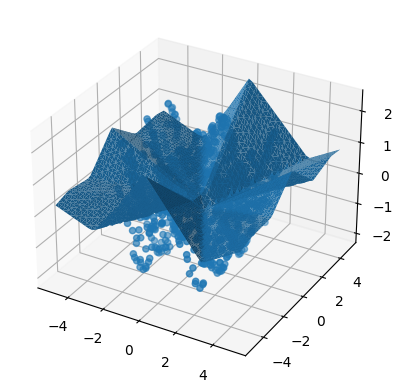

In [ ]:
#can it extrapolate?
#plot the prediction surface
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x[:,0],x[:,1],y)

#surface plot
line=np.linspace(-5,5,50)
xx,yy=np.meshgrid(line,line)
xgrid=np.vstack((xx.flatten(),yy.flatten())).T
yhat=model.predict(xgrid).flatten()
ax.plot_trisurf(xgrid[:,0],xgrid[:,1],yhat,linewidth=0.2,antialiased=True)
plt.show()